# Factor analysis

This generates synthetic data, factor-analyzes it, and saves the resulting figures to be used the factor analysis rotations section.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from factor_analyzer import FactorAnalyzer, Rotator

In [2]:
np.random.seed(742)
data = pd.DataFrame(np.random.multivariate_normal(np.array([0, 0]), np.array([[1, 0.7], [0.7, 1]]), (2, 300)).reshape((-1, 2)), columns=['envir', 'time'])
data.head()

,envir,time
0,1.890107,1.519451
1,-1.048748,-0.452921
2,0.635715,1.896312
3,1.946989,2.315574
4,-0.009117,0.596772


In [3]:
# measurements with error
data['i_cost'] = -data.envir + np.random.normal(size=len(data))
data['i_econ'] = data.envir +  np.random.normal(size=len(data))
data['i_waste'] = data.time + np.random.normal(size=len(data))
data['i_traffic'] = -data.time + np.random.normal(size=len(data))

In [4]:
data.corr()

,envir,time,i_cost,i_econ,i_waste,i_traffic
envir,1.000000,0.686911,-0.720035,0.713645,0.434869,-0.476772
time,0.686911,1.000000,-0.469674,0.482158,0.692895,-0.721847
i_cost,-0.720035,-0.469674,1.000000,-0.510523,-0.264181,0.308851
i_econ,0.713645,0.482158,-0.510523,1.000000,0.237575,-0.324786
i_waste,0.434869,0.692895,-0.264181,0.237575,1.000000,-0.493566
i_traffic,-0.476772,-0.721847,0.308851,-0.324786,-0.493566,1.000000


In [5]:
norot = FactorAnalyzer(rotation=None, n_factors=2)
factors = norot.fit_transform(data[['i_cost', 'i_econ', 'i_waste', 'i_traffic']])
norot_loadings = norot.loadings_
norot_loadings.round(2)

array([[-0.58, -0.19],
       [ 0.73,  0.45],
       [ 0.59, -0.44],
       [-0.62,  0.29]])

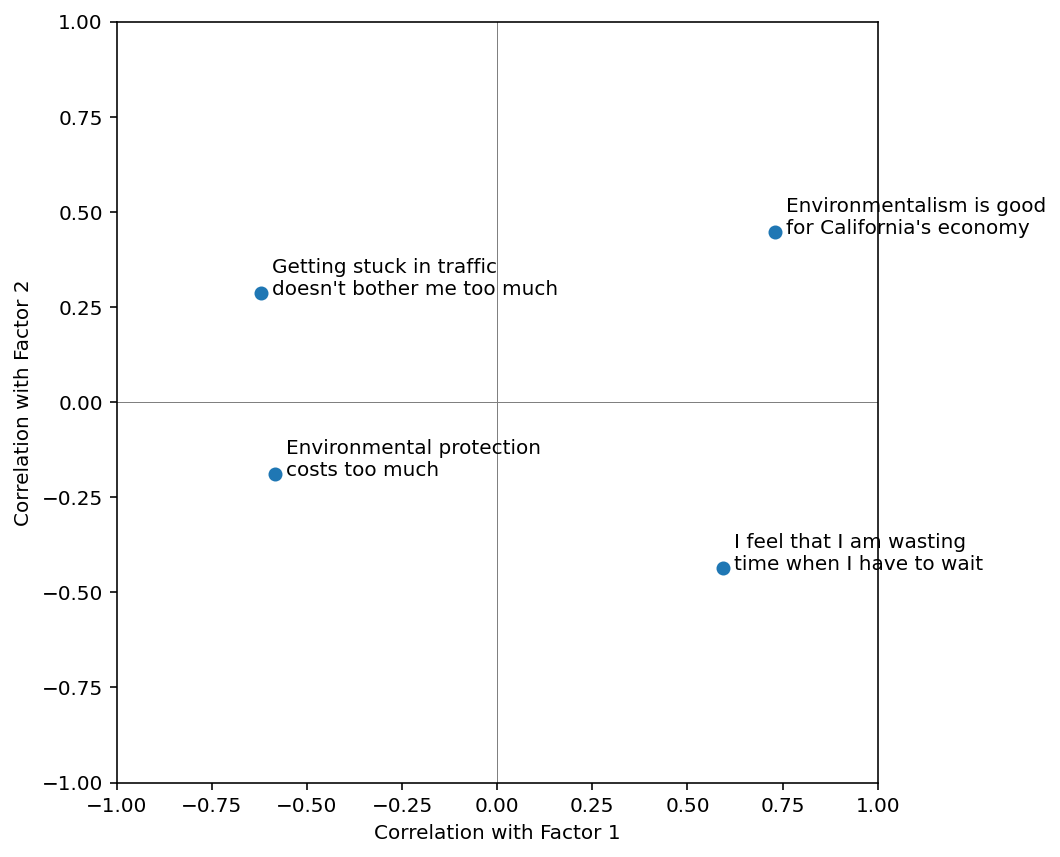

In [6]:
f, ax = plt.subplots(figsize=(7,7))
plt.axvline(0, color='gray', lw=0.5)
plt.axhline(0, color='gray', lw=0.5)

# plt.fill_between([-1, 1], [0.3, 0.3], [10, 10], color='gray', alpha=0.15)
# plt.fill_between([-1, 1], [-0.3, -0.3], [-10, -10], color='gray', alpha=0.15)

# plt.fill_betweenx([-1, 1], [0.3, 0.3], [10, 10], color='gray', alpha=0.15)
# plt.fill_betweenx([-1, 1], [-0.3, -0.3], [-10, -10], color='gray', alpha=0.15)

plt.scatter(norot_loadings[:,0], norot_loadings[:,1])
ax.set_aspect('equal')

for x, y, label in zip(norot_loadings[:,0], norot_loadings[:,1],
                       ['Environmental protection\ncosts too much', 'Environmentalism is good\nfor California\'s economy',
                        'I feel that I am wasting\ntime when I have to wait', 'Getting stuck in traffic\ndoesn\'t bother me too much']):
    ax.annotate(label, (x + 0.03, y - 0.005))
    
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel('Correlation with Factor 1')
plt.ylabel('Correlation with Factor 2')
plt.savefig('../fig/factor_no_rotation.pdf', bbox_inches='tight')

In [7]:
varimax = Rotator(method='varimax')
varimax.fit(norot.loadings_)

varimax_loadings = varimax.loadings_
varimax_loadings.round(2)

# factors are unique to a change in sign - mirror if necessary


array([[-0.56,  0.26],
       [ 0.84, -0.16],
       [ 0.14, -0.72],
       [-0.26,  0.63]])

Text(0.5, 1.0, 'varimax')

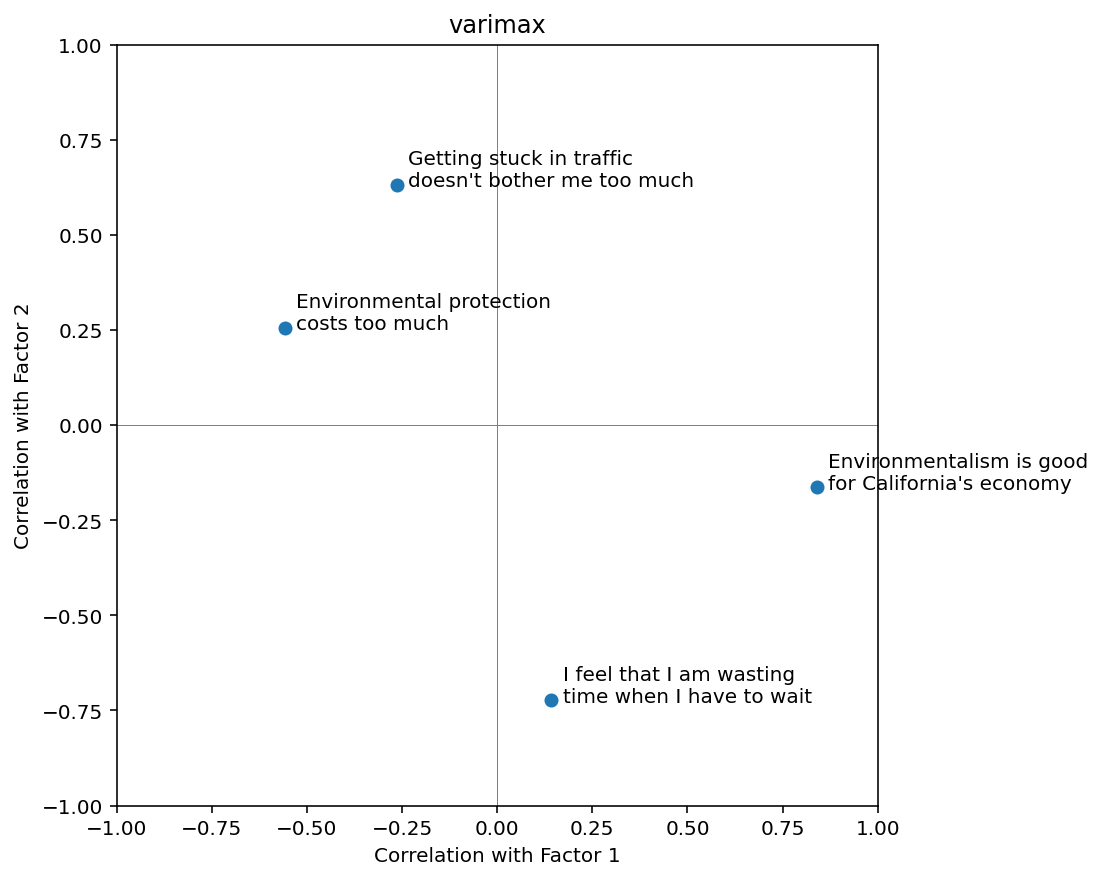

In [8]:
f, ax = plt.subplots(figsize=(7,7))
plt.axvline(0, color='gray', lw=0.5)
plt.axhline(0, color='gray', lw=0.5)

# plt.fill_between([-1, 1], [0.3, 0.3], [10, 10], color='gray', alpha=0.15)
# plt.fill_between([-1, 1], [-0.3, -0.3], [-10, -10], color='gray', alpha=0.15)

# plt.fill_betweenx([-1, 1], [0.3, 0.3], [10, 10], color='gray', alpha=0.15)
# plt.fill_betweenx([-1, 1], [-0.3, -0.3], [-10, -10], color='gray', alpha=0.15)

plt.scatter(varimax_loadings[:,0], varimax_loadings[:,1])
ax.set_aspect('equal')

for x, y, label in zip(varimax_loadings[:,0], varimax_loadings[:,1],
                       ['Environmental protection\ncosts too much', 'Environmentalism is good\nfor California\'s economy',
                        'I feel that I am wasting\ntime when I have to wait', 'Getting stuck in traffic\ndoesn\'t bother me too much']):
    ax.annotate(label, (x + 0.03, y - 0.005))
    
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel('Correlation with Factor 1')
plt.ylabel('Correlation with Factor 2')
plt.title('varimax')

In [9]:
# The examples in this article apply to active rotations of vectors counterclockwise in a right-handed coordinate system by pre-multiplication.
# If any one of these is changed (such as rotating axes instead of vectors, a passive transformation),
# then the inverse of the example matrix should be used, which coincides with its transpose.
# https://en.wikipedia.org/wiki/Rotation_matrix

rotMat = varimax.rotation_.T
axes = [np.array([0, 1]), np.array([1, 0])]
transformedAxes = np.array([np.matmul(rotMat, a) for a in axes])

In [10]:
transformedAxes

array([[ 0.67653284,  0.73641246],
       [ 0.73641246, -0.67653284]])

In [11]:
transformedAxes[:,0]

array([0.67653284, 0.73641246])

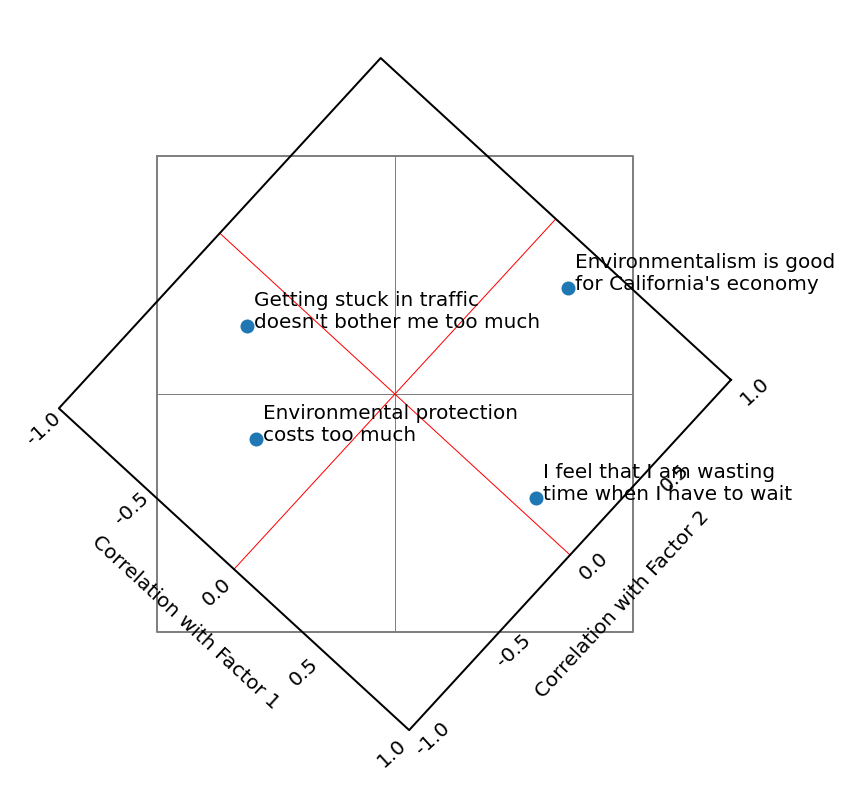

In [12]:
f, ax = plt.subplots(figsize=(7,7))
plt.plot([-1, 1], [0, 0], color='gray', lw=0.5)
plt.plot([0, 0], [-1, 1], color='gray', lw=0.5)

# fake the old coordinate frame
plt.plot([-1, 1, 1, -1, -1], [1, 1, -1, -1, 1], color='gray', lw=1)
# and remove the actual frame
ax.axis('off')

for axis in transformedAxes:
    plt.plot([-axis[0], axis[0]], [-axis[1], axis[1]], color='red', lw=0.5)
    
x = transformedAxes[:,0]
y = transformedAxes[:,1]
plt.plot([x[0] + x[1], x[0] - x[1], -x[0] - x[1], -x[0] + x[1], x[0] + x[1]],
         [y[0] + y[1], y[0] - y[1], -y[0] - y[1], -y[0] + y[1], y[0] + y[1]],
        color='black', lw=1)

xs = np.linspace(-x[0] - x[1], -x[0] + x[1], 5)
ys = np.linspace(-y[0] - y[1], -y[0] + y[1], 5)
labels = np.linspace(-1, 1, 5)
for xc, yc, label in zip(xs, ys, labels):
    ax.annotate(label, (xc - 0.15, yc - 0.15), rotation=np.rad2deg(np.arccos(rotMat[0,0])))
    
xs = np.linspace(-x[0] + x[1], x[0] + x[1], 5)
ys = np.linspace(-y[0] + y[1], y[0] + y[1], 5)
labels = np.linspace(-1, 1, 5)
for xc, yc, label in zip(xs, ys, labels):
    ax.annotate(label, (xc + 0.1, yc - 0.1), rotation=np.rad2deg(np.arccos(rotMat[0,0])), horizontalalignment='center')
    
ax.annotate('Correlation with Factor 1', 1.3 * -transformedAxes[:,0], rotation=np.rad2deg(np.arccos(-rotMat[0,0])) + 180,
           horizontalalignment='center', verticalalignment='center')

ax.annotate('Correlation with Factor 2', 1.3 * transformedAxes[:,1], rotation=np.rad2deg(np.arccos(rotMat[0,1])),
           horizontalalignment='center', verticalalignment='center')


# draw the rotated system
# https://stackoverflow.com/questions/28417604


plt.scatter(norot.loadings_[:,0], norot.loadings_[:,1])
ax.set_aspect('equal')

for x, y, label in zip(norot.loadings_[:,0], norot.loadings_[:,1],
                       ['Environmental protection\ncosts too much', 'Environmentalism is good\nfor California\'s economy',
                        'I feel that I am wasting\ntime when I have to wait', 'Getting stuck in traffic\ndoesn\'t bother me too much']):
    ax.annotate(label, (x + 0.03, y - 0.005))
    
#plt.xlabel('Correlation with Factor 1')
#plt.ylabel('Correlation with Factor 2')
plt.xticks([])
plt.yticks([])

plt.xlim([-1.6, 1.6])
plt.ylim([-1.6, 1.6])
plt.savefig('../fig/factor_varimax.pdf', bbox_inches='tight')

In [13]:
oblimin = Rotator(method='oblimin')
oblimin.fit(norot.loadings_)
oblimin_loadings = oblimin.loadings_

Text(0.5, 1.0, 'oblimin')

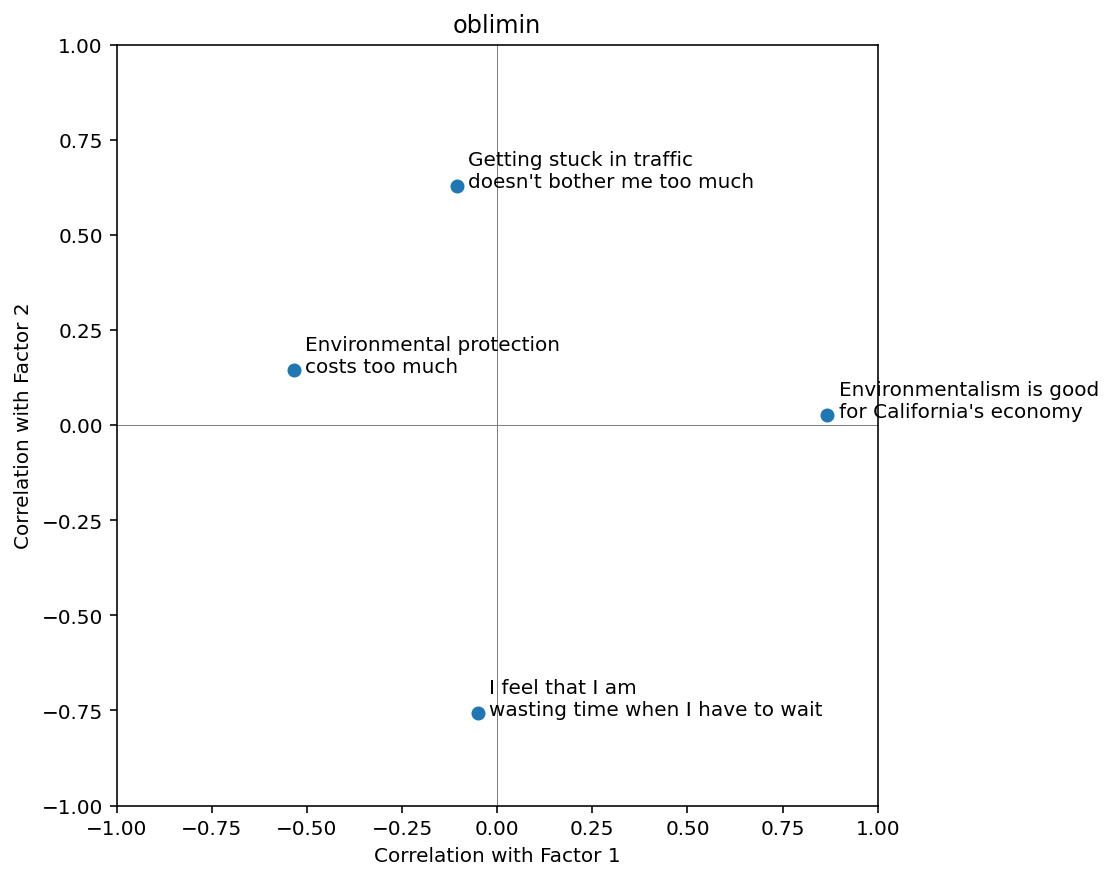

In [14]:
f, ax = plt.subplots(figsize=(7,7))
plt.axvline(0, color='gray', lw=0.5)
plt.axhline(0, color='gray', lw=0.5)

# plt.fill_between([-1, 1], [0.3, 0.3], [10, 10], color='gray', alpha=0.15)
# plt.fill_between([-1, 1], [-0.3, -0.3], [-10, -10], color='gray', alpha=0.15)

# plt.fill_betweenx([-1, 1], [0.3, 0.3], [10, 10], color='gray', alpha=0.15)
# plt.fill_betweenx([-1, 1], [-0.3, -0.3], [-10, -10], color='gray', alpha=0.15)

plt.scatter(oblimin_loadings[:,0], oblimin_loadings[:,1])
ax.set_aspect('equal')

for x, y, label in zip(oblimin_loadings[:,0], oblimin_loadings[:,1],
                       ['Environmental protection\ncosts too much', 'Environmentalism is good\nfor California\'s economy',
                        'I feel that I am\nwasting time when I have to wait', 'Getting stuck in traffic\ndoesn\'t bother me too much']):
    ax.annotate(label, (x + 0.03, y - 0.005))
    
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel('Correlation with Factor 1')
plt.ylabel('Correlation with Factor 2')
plt.title('oblimin')

In [15]:
oblimin_loadings.round(2)

array([[-0.53,  0.14],
       [ 0.87,  0.03],
       [-0.05, -0.76],
       [-0.11,  0.63]])

In [16]:
# The examples in this article apply to active rotations of vectors counterclockwise in a right-handed coordinate system by pre-multiplication.
# If any one of these is changed (such as rotating axes instead of vectors, a passive transformation),
# then the inverse of the example matrix should be used, which coincides with its transpose.
# https://en.wikipedia.org/wiki/Rotation_matrix

rotMat = oblimin.rotation_
axes = [np.array([0, 1]), np.array([-1, 0])]
transformedAxes = np.array([np.matmul(rotMat, a) for a in axes])

In [17]:
transformedAxes

array([[-0.84120393,  0.540718  ],
       [-0.86614068, -0.49980029]])

When working with oblique rotations, there are two loadings, which are the pattern and structure loadings. See [this StackOverflow answer](https://stats.stackexchange.com/questions/166799/which-matrix-should-be-interpreted-in-factor-analysis-pattern-matrix-or-structu) for the clearest explanation I've seen. The structure loading is the correlation between the factor and the variable, whereas the pattern loading is the regression coefficient to estimate the variables from the factors. In an orthogonal rotation, these are the same, but in an oblique rotation they can differ since the factors themselves are correlated.

For instance, in the example below, "I feel that I am wasting time when I have to wait" has a positive pattern loading but a negative structure loading, because the factors are negatively correlated.

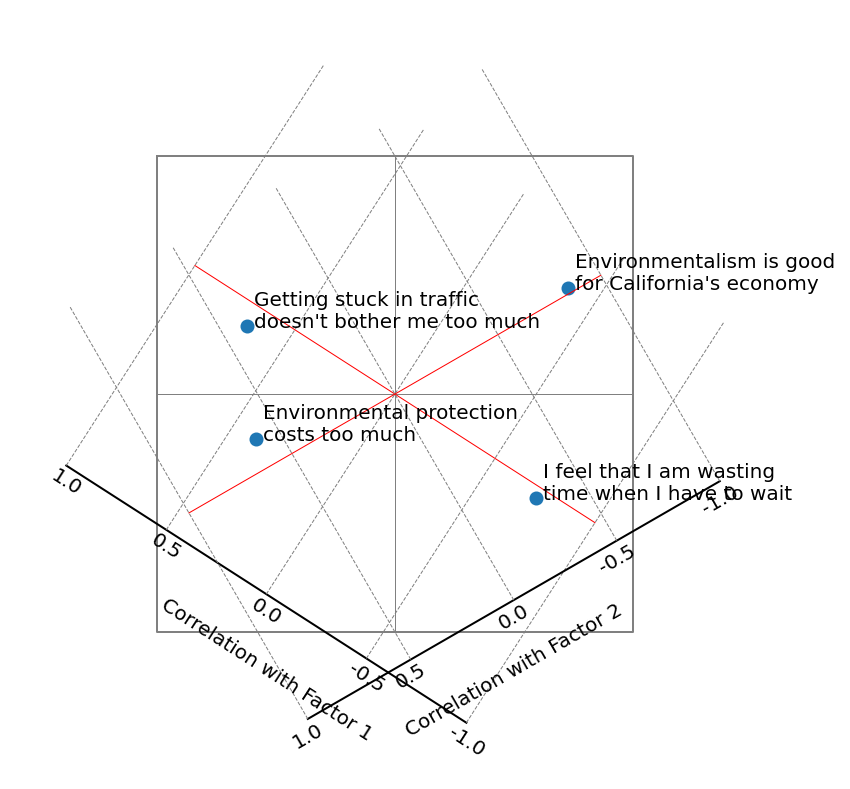

In [18]:
f, ax = plt.subplots(figsize=(7,7))
plt.plot([-1, 1], [0, 0], color='gray', lw=0.5)
plt.plot([0, 0], [-1, 1], color='gray', lw=0.5)

# fake the old coordinate frame
plt.plot([-1, 1, 1, -1, -1], [1, 1, -1, -1, 1], color='gray', lw=1)
# and remove the actual frame
ax.axis('off')

for facno, axis in enumerate(transformedAxes):
    plt.plot([-axis[0], axis[0]], [-axis[1], axis[1]], color='red', lw=0.5)
    plt.plot([-axis[0] - axis[1], axis[0] - axis[1]], [-axis[1] + axis[0], axis[1] + axis[0]], color='black', lw=1)
    
    rotation = np.rad2deg(np.arcsin(-axis[1]))
    
    xs = np.linspace(-axis[0] - axis[1], axis[0] - axis[1], 5)
    ys = np.linspace(-axis[1] + axis[0], axis[1] + axis[0], 5)
    for xc, yc, label in zip(xs, ys, labels):
         ax.annotate(label, (xc, yc), rotation=rotation,
                horizontalalignment='center', verticalalignment='top')
            
    ax.annotate(f'Correlation with Factor {facno + 1}', (xs[2], ys[2]), rotation=rotation,
        horizontalalignment='center', verticalalignment='top')
            
    xstarts = np.linspace(-axis[0] - axis[1], axis[0] - axis[1], 5)
    xends = np.linspace(-axis[0] + axis[1], axis[0] + axis[1], 5)
    ystarts = np.linspace(-axis[1] + axis[0], axis[1] + axis[0], 5)
    yends = np.linspace(-axis[1] - axis[0], axis[1] - axis[0], 5)
    for xstart, xend, ystart, yend in zip(xstarts, xends, ystarts, yends):
        plt.plot([xstart, xend], [ystart, yend], color='gray', ls='--', lw=0.5)




# plt.plot([x[0] + x[1], x[0] - x[1], -x[0] - x[1], -x[0] + x[1], x[0] + x[1]],
#          [y[0] + y[1], y[0] - y[1], -y[0] - y[1], -y[0] + y[1], y[0] + y[1]],
#         color='black', lw=1)

# xs = np.linspace(-x[0] - x[1], -x[0] + x[1], 5)
# ys = np.linspace(-y[0] - y[1], -y[0] + y[1], 5)
# labels = np.linspace(-1, 1, 5)
# for xc, yc, label in zip(xs, ys, labels):
#     ax.annotate(label, (xc - 0.15, yc - 0.15), rotation=np.rad2deg(np.arccos(rotMat[0,0])))
    
# xs = np.linspace(-x[0] + x[1], x[0] + x[1], 5)
# ys = np.linspace(-y[0] + y[1], y[0] + y[1], 5)
# labels = np.linspace(-1, 1, 5)
# for xc, yc, label in zip(xs, ys, labels):
#     ax.annotate(label, (xc + 0.1, yc - 0.1), rotation=np.rad2deg(np.arccos(rotMat[0,0])), horizontalalignment='center')
    
# ax.annotate('Correlation with Factor 1', 1.3 * -transformedAxes[:,0], rotation=np.rad2deg(np.arccos(-rotMat[0,0])) + 180,
#            horizontalalignment='center', verticalalignment='center')

# ax.annotate('Correlation with Factor 2', 1.3 * transformedAxes[:,1], rotation=np.rad2deg(np.arccos(rotMat[0,1])),
#            horizontalalignment='center', verticalalignment='center')


# draw the rotated system
# https://stackoverflow.com/questions/28417604


plt.scatter(norot.loadings_[:,0], norot.loadings_[:,1])
ax.set_aspect('equal')

for x, y, label in zip(norot.loadings_[:,0], norot.loadings_[:,1],
                       ['Environmental protection\ncosts too much', 'Environmentalism is good\nfor California\'s economy',
                        'I feel that I am wasting\ntime when I have to wait', 'Getting stuck in traffic\ndoesn\'t bother me too much']):
    ax.annotate(label, (x + 0.03, y - 0.005))
    
#plt.xlabel('Correlation with Factor 1')
#plt.ylabel('Correlation with Factor 2')
plt.xticks([])
plt.yticks([])

plt.xlim([-1.6, 1.6])
plt.ylim([-1.6, 1.6])
plt.savefig('../fig/factor_oblimin_structure.pdf', bbox_inches='tight')

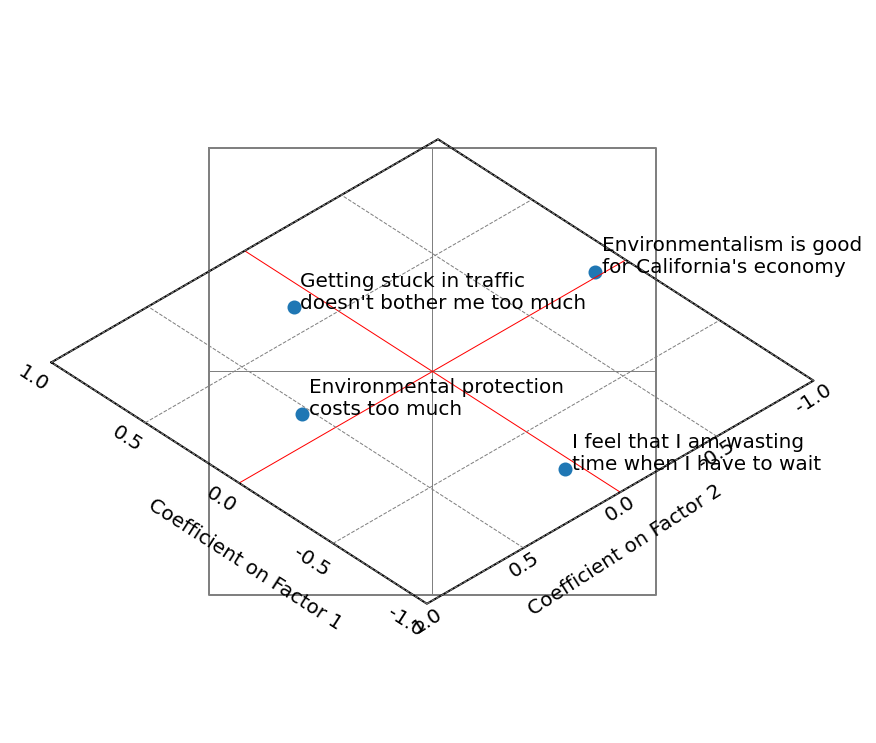

In [19]:
f, ax = plt.subplots(figsize=(7,7))
plt.plot([-1, 1], [0, 0], color='gray', lw=0.5)
plt.plot([0, 0], [-1, 1], color='gray', lw=0.5)

# fake the old coordinate frame
plt.plot([-1, 1, 1, -1, -1], [1, 1, -1, -1, 1], color='gray', lw=1)
# and remove the actual frame
ax.axis('off')

for facno, axis in enumerate(transformedAxes):
    plt.plot([-axis[0], axis[0]], [-axis[1], axis[1]], color='red', lw=0.5)

x = transformedAxes[:,0]
y = transformedAxes[:,1]
plt.plot([x[0] + x[1], x[0] - x[1], -x[0] - x[1], -x[0] + x[1], x[0] + x[1]],
         [y[0] + y[1], y[0] - y[1], -y[0] - y[1], -y[0] + y[1], y[0] + y[1]],
        color='black', lw=1)

xs = np.linspace(-x[0] - x[1], -x[0] + x[1], 5)
ys = np.linspace(-y[0] - y[1], -y[0] + y[1], 5)
labels = np.linspace(-1, 1, 5)
for xc, yc, label in zip(xs, ys, labels):
    ax.annotate(label, (xc, yc), rotation=np.rad2deg(np.arccos(-x[0])),
                horizontalalignment='center', verticalalignment='top')
    
xstarts = np.linspace(-x[0] + x[1], -x[0] - x[1], 5)[(0,1,3,4),]
ystarts = np.linspace(-y[0] + y[1], -y[0] - y[1], 5)[(0,1,3,4),]
xends = np.linspace(x[0] + x[1], x[0] - x[1], 5)[(0,1,3,4),]
yends = np.linspace(y[0] + y[1], y[0] - y[1], 5)[(0,1,3,4),]
for xstart, ystart, xend, yend in zip(xstarts, ystarts, xends, yends):
    plt.plot([xstart, xend], [ystart, yend], lw=0.5, ls='--', color='gray')
    
xs = np.linspace(-x[0] + x[1], x[0] + x[1], 5)
ys = np.linspace(-y[0] + y[1], y[0] + y[1], 5)
labels = np.linspace(-1, 1, 5)
for xc, yc, label in zip(xs, ys, labels):
    ax.annotate(label, (xc, yc), rotation=np.rad2deg(np.arccos(x[0])) + 180, horizontalalignment='right', verticalalignment='top')
    
xstarts = np.linspace(-x[0] + x[1], x[0] + x[1], 5)[(0,1,3,4),]
ystarts = np.linspace(-y[0] + y[1], y[0] + y[1], 5)[(0,1,3,4),]   
xends = np.linspace(-x[0] - x[1], x[0] - x[1], 5)[(0,1,3,4),]
yends = np.linspace(-y[0] - y[1], y[0] - y[1], 5)[(0,1,3,4),]
for xstart, ystart, xend, yend in zip(xstarts, ystarts, xends, yends):
    plt.plot([xstart, xend], [ystart, yend], lw=0.5, ls='--', color='gray')

ax.annotate('Coefficient on Factor 1', transformedAxes[:,0], rotation=np.rad2deg(np.arccos(x[0])) + 180,
           horizontalalignment='center', verticalalignment='center')

ax.annotate('Coefficient on Factor 2', 1.6 * transformedAxes[:,1], rotation=np.rad2deg(np.arccos(-x[0])),
           horizontalalignment='center', verticalalignment='center')


# draw the rotated system
# https://stackoverflow.com/questions/28417604


plt.scatter(norot.loadings_[:,0], norot.loadings_[:,1])
ax.set_aspect('equal')

for x, y, label in zip(norot.loadings_[:,0], norot.loadings_[:,1],
                       ['Environmental protection\ncosts too much', 'Environmentalism is good\nfor California\'s economy',
                        'I feel that I am wasting\ntime when I have to wait', 'Getting stuck in traffic\ndoesn\'t bother me too much']):
    ax.annotate(label, (x + 0.03, y - 0.005))
    
#plt.xlabel('Correlation with Factor 1')
#plt.ylabel('Correlation with Factor 2')
plt.xticks([])
plt.yticks([])

plt.xlim([-1.75, 1.75])
plt.ylim([-1.6, 1.6])
plt.savefig('../fig/factor_oblimin_pattern.pdf', bbox_inches='tight')

In [20]:
obliminAn = FactorAnalyzer(rotation='oblimin', n_factors=2)
obliminAn.fit(data[['i_cost', 'i_econ', 'i_waste', 'i_traffic']])

FactorAnalyzer(n_factors=2, rotation='oblimin', rotation_kwargs={})

In [21]:
obliminAn.structure_

array([[-0.60036376,  0.38929171],
       [ 0.85529811, -0.37148644],
       [ 0.29596956, -0.73436133],
       [-0.39484399,  0.6779916 ]])

In [22]:
obliminAn.loadings_

array([[-0.53414829,  0.14446487],
       [ 0.86721613,  0.02600201],
       [-0.05142944, -0.75793401],
       [-0.10645013,  0.62920019]])